In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel("C:\Личные документы\data\_nornik.xlsx").set_index('Date')
df = df.drop('Deals', axis=1)
df.to_csv('stock_price_nn.csv')

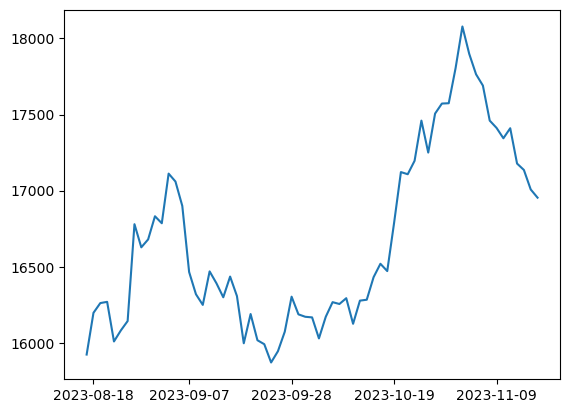

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('stock_price_nn.csv').set_index('Date')
plt.plot(df)
plt.xticks([1, 15, 30, 45, 60]) 
plt.show()

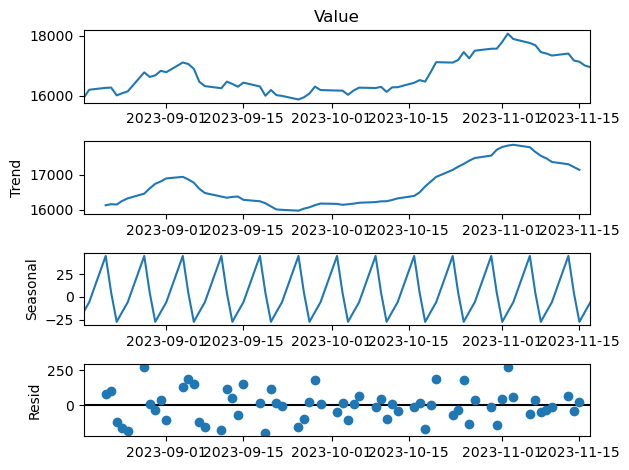

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Value'])
fig = decomposition.plot()
plt.show()

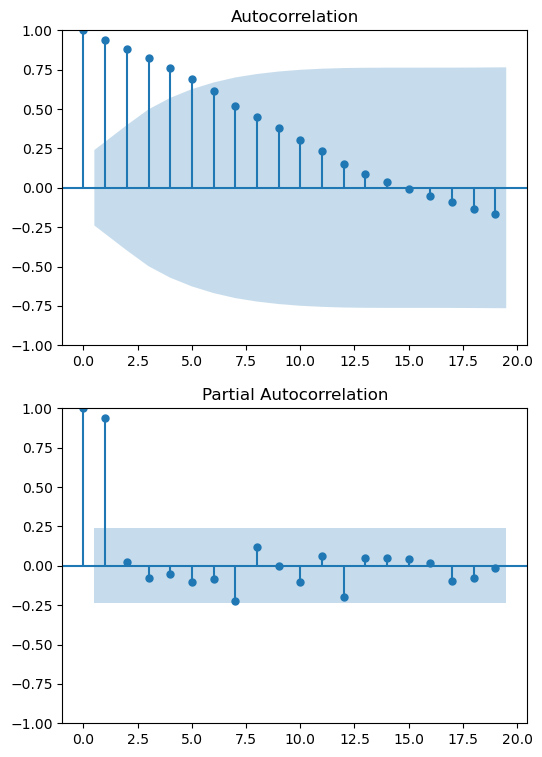

In [58]:
import statsmodels.graphics.tsaplots as sgt

def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 6, 9

    fig, axes = plt.subplots(2, 1)

    sgt.plot_acf(series, ax=axes[0])
    sgt.plot_pacf(series, ax=axes[1], method='ywm')
    plt.show()

plot_acf_pacf(df)

In [5]:
from statsmodels.tsa.stattools import adfuller

stats = adfuller(df) # Исходный ряд
print("adf: ", stats[0])
print("p-value: ", stats[1])
print("Critical values: ", stats[4])
if stats[0] > stats[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

print()
    
stats = adfuller(df.diff().dropna()) # 1-й дифферент
print("adf: ", stats[0])
print("p-value: ", stats[1])
print("Critical values: ", stats[4])
if stats[0] > stats[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -1.5395352016096284
p-value:  0.5138711420851866
Critical values:  {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
ряд нестационарен

adf:  -7.988804805426907
p-value:  2.5066452655360256e-12
Critical values:  {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}
ряд стационарен


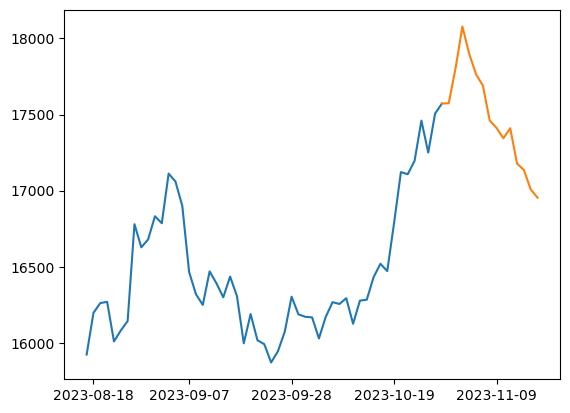

In [57]:
train = df[:-15]
test = df[-15:]
filler = df[-16:-14]

plt.plot(pd.concat([train, filler]))
plt.plot(test)
plt.xticks([1, 15, 30, 45, 60]) 
plt.show()

c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_2416\854714127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = pred


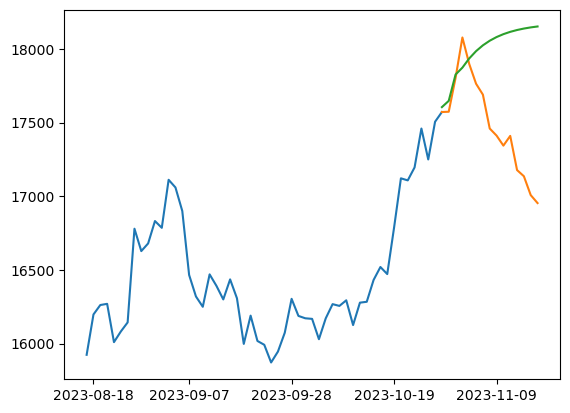

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1, 1, 5), seasonal_order=(0, 0, 0, 0)).fit(maxiter=100)
pred = model.predict(start=test.index[0], end=test.index[-1])
test['pred'] = pred

plt.plot(pd.concat([train, filler]))
plt.plot(test)
plt.xticks([1, 15, 30, 45, 60]) 
plt.show()

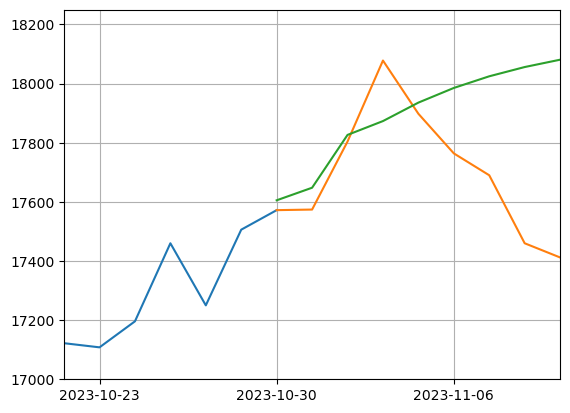

In [100]:
plt.plot(pd.concat([train, filler]))
plt.plot(test)
plt.xticks([47, 52, 57]) 
plt.xlim('2023-10-20', '2023-11-09')
plt.ylim(17000, 18250)
plt.grid()
plt.show()


In [101]:
import pmdarima as pm

smodel = pm.auto_arima(
    train,
    start_p=1,
    d=1,
    start_q=1,
    max_p=5,
    max_q=5,
    D=1,
    start_P=0,
    m=5,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=640.872, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=638.184, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=638.163, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[5]             : AIC=642.783, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=639.957, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[5]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[5]             : AIC=638.150, Time=0.07 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=640.074, Time=0.09 sec
 ARIMA(0,1,1)(2,1,1)[5]             : AIC=641.931, Time=0.18 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=636.473, Time=0.05 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=638.453, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,1,1)[5]             : AIC=636.296, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[5]             : AIC=inf, Time=0.13 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   52
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 5)   Log Likelihood                -316.148
Date:                             Fri, 01 Dec 2023   AIC                            636.296
Time:                                     13:18:51   BIC                            639.953
Sample:                                 08-17-2023   HQIC                           637.666
                                      - 10-27-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L5       -0.4531      0.136     -3.337      0.001      -0.719      -0.187
sigma2      4.773e+04   9294.576      5.135      0.000    2.95e+04    6.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.38   Prob(JB):                         0.47
Heteroskedasticity (H):               0.41   Skew:                            -0.37
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_2416\1339744117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = pred


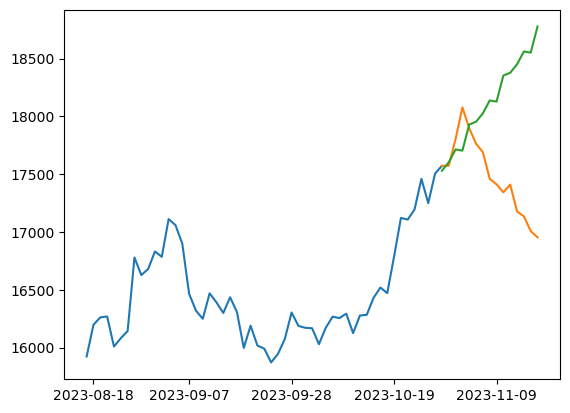

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(0, 1, 0), seasonal_order=(0, 1, 1, 5)).fit(maxiter=100)
pred = model.predict(start=test.index[0], end=test.index[-1])
test['pred'] = pred

plt.plot(pd.concat([train, filler]))
plt.plot(test)
plt.xticks([1, 15, 30, 45, 60]) 
plt.show()

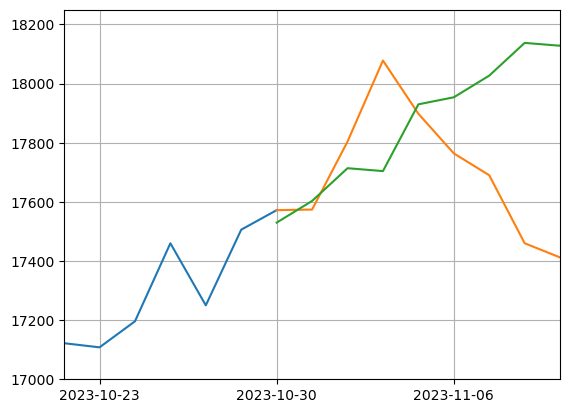

In [104]:
plt.plot(pd.concat([train, filler]))
plt.plot(test)
plt.xticks([47, 52, 57]) 
plt.xlim('2023-10-20', '2023-11-09')
plt.ylim(17000, 18250)
plt.grid()
plt.show()

c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\AubakirovMA\AppD

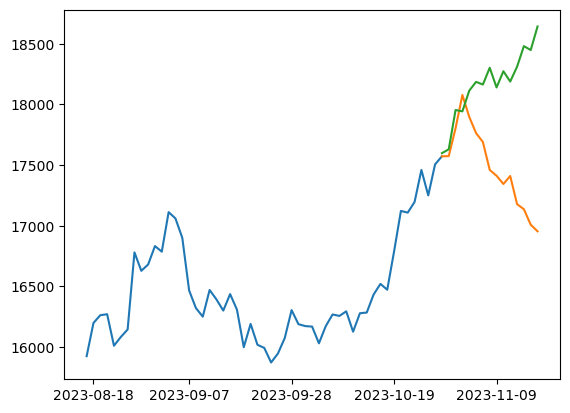

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(3, 1, 10, 5)).fit(maxiter=100)
pred = model.predict(start=test.index[0], end=test.index[-1])
test['pred'] = pred

plt.plot(pd.concat([train, filler]))
plt.plot(test)
plt.xticks([1, 15, 30, 45, 60]) 
plt.show()

In [ ]:
plt.plot(pd.concat([train, filler]))
plt.plot(test)
plt.xticks([47, 52, 57]) 
plt.xlim('2023-10-20', '2023-11-09')
plt.ylim(17000, 18250)
plt.grid()
plt.show()